In [2]:
!pip install -q rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 53.4 MB/s eta 0:00:00


In [3]:
from collections import defaultdict, Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools

# Analysing Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
dataset_path = "/content/drive/MyDrive/enzyme_additive_dataset.csv"

df = pd.read_csv(dataset_path, index_col=0)

In [21]:
num_ref = len(df["ref"].unique())
num_sub = len(df["substrate"].unique())
num_add = len(df["additive"].unique())

In [22]:
print(f"Number of data: {df.shape[0]}")
print(f"Number of references: {num_ref}")
print(f"Number of unique substrate: {num_sub}")
print(f"Number of unique additive: {num_add}")

Number of data: 457
Number of references: 70
Number of unique substrate: 23
Number of unique additive: 73


In [23]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="additive_smiles", molCol="additive_mol")
PandasTools.AddMoleculeColumnToFrame(df, smilesCol="substrate_smiles", molCol="substrate_mol")

In [24]:
df["additive_MolW"] = df["additive_mol"].apply(Descriptors.ExactMolWt)
MolWs = df["additive_MolW"]
MolWs_statics = MolWs.describe().to_dict()

print(f"""Molecular Weights Statics:

Min: {MolWs_statics["min"]:.3f}
Max: {MolWs_statics["max"]:.3f}
Mean: {MolWs_statics["mean"]:.3f}
""")

Molecular Weights Statics:

Min: 30.011
Max: 1198.801
Mean: 92.089



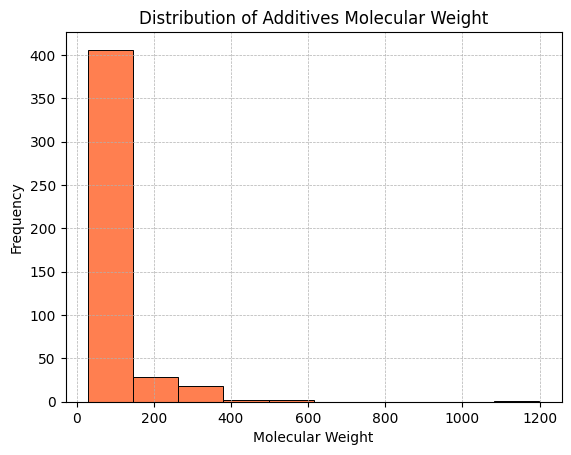

In [25]:
plt.hist(MolWs, bins=10, color="coral",
         edgecolor="black",
        linewidth=0.7)
plt.xlabel("Molecular Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Additives Molecular Weight")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig("Distribution of Additives Molecular Weight.png", dpi=300)
plt.show()

In [26]:
mols = df["additive_mol"].tolist()

In [27]:
molecules = []
for mol in mols:
    atoms = []
    for atom in mol.GetAtoms():
        atoms.append(atom.GetSymbol())
    molecules.append(set(atoms))

flat_molecules_list = [item for sublist in molecules for item in sublist]
element_freq = Counter(flat_molecules_list)

element_freq

Counter({'C': 457,
         'S': 45,
         'O': 340,
         'Cl': 18,
         'N': 57,
         'Na': 2,
         'F': 1,
         'Br': 1})

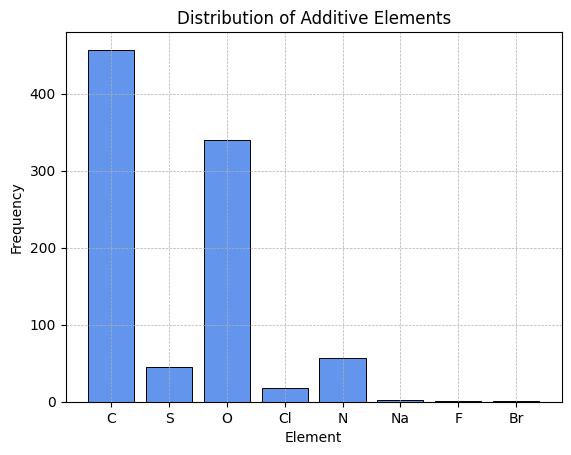

In [28]:
plt.bar(element_freq.keys(), element_freq.values(),
        color="cornflowerblue",
        edgecolor="black",
        linewidth=0.7)
plt.xlabel("Element")
plt.ylabel("Frequency")
plt.title("Distribution of Additive Elements")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.savefig("Distribution of Additive Elements.png", dpi=300)
plt.show()

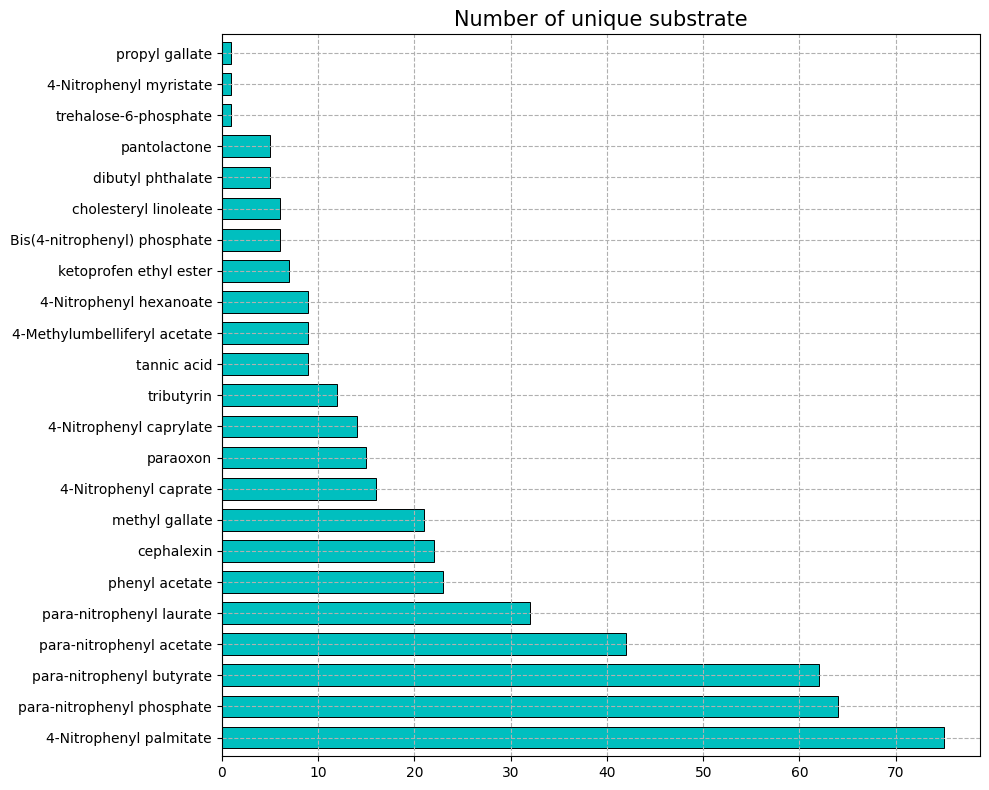

In [29]:
fig = plt.figure(figsize=(10, 8))
df['substrate'].value_counts().plot.barh(width=0.7,
                                         color='c',
                                         edgecolor='black',
                                         linewidth=0.7)
plt.grid(linestyle='--', linewidth=0.8)
plt.title("Number of unique substrate", size=15)
plt.tight_layout()
plt.savefig("Number of unique substrate.png", dpi=300)
plt.show()

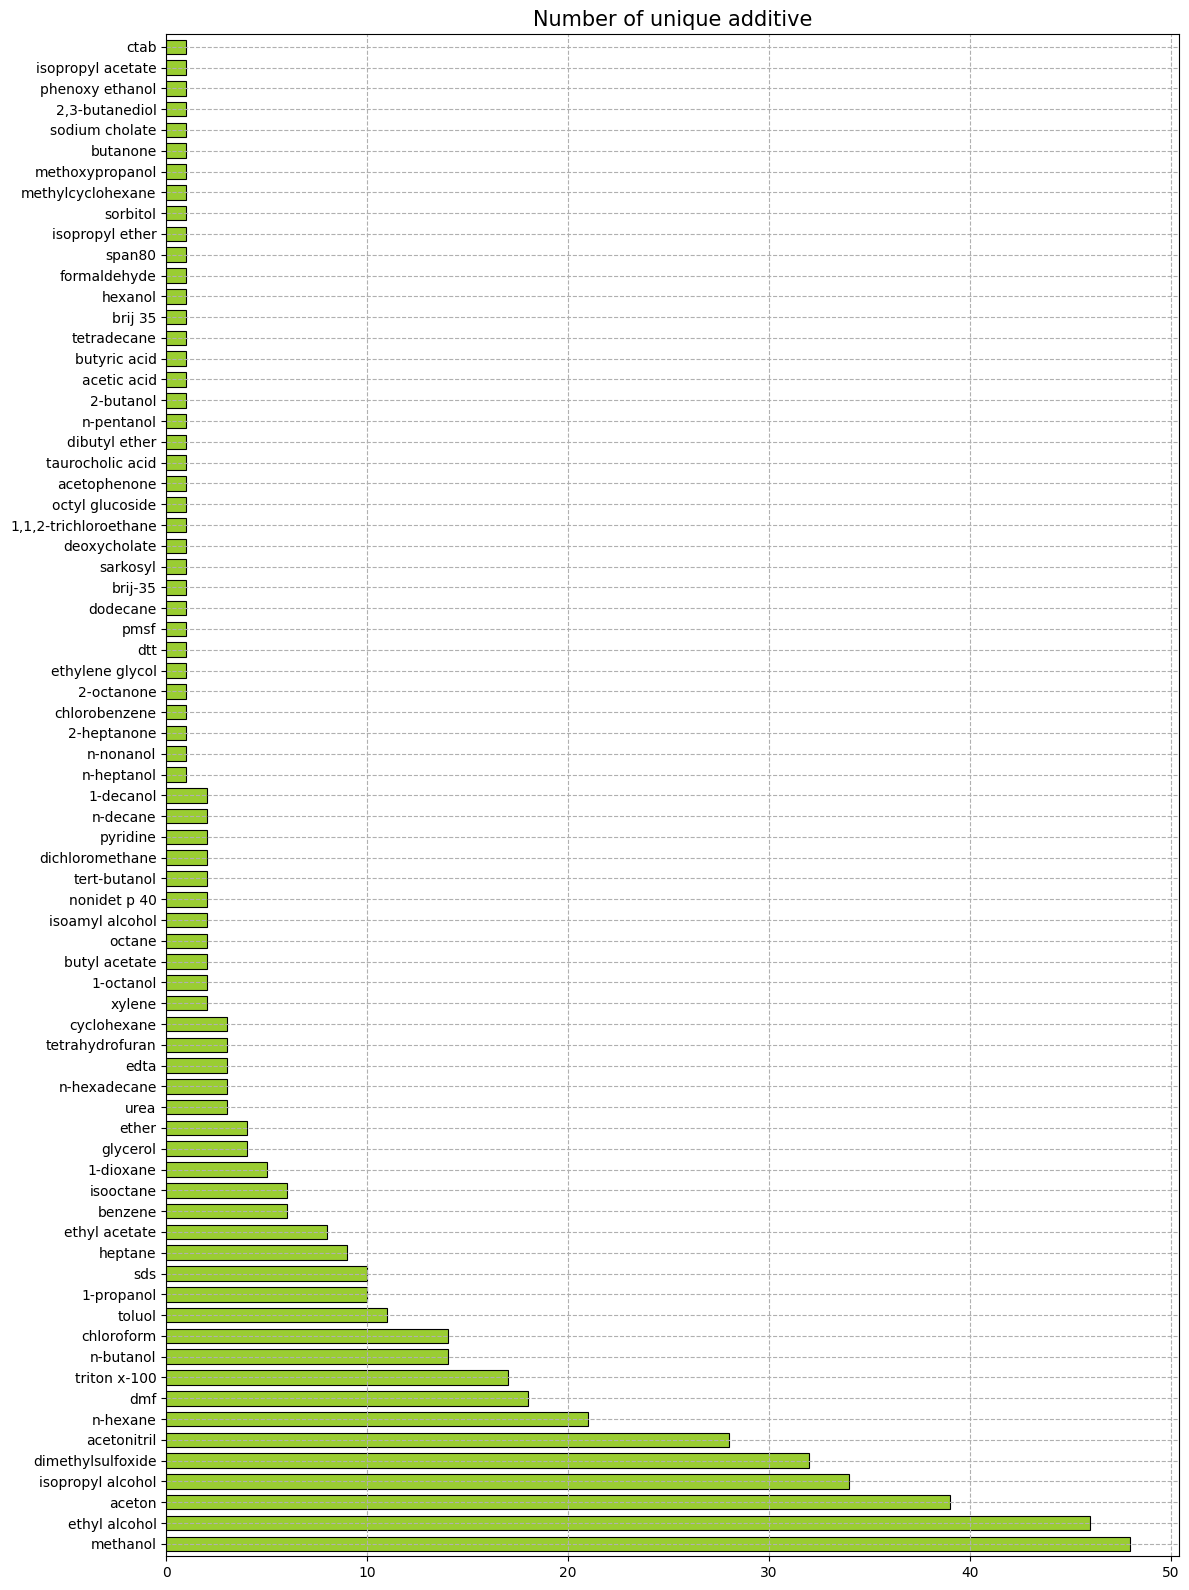

In [30]:
fig = plt.figure(figsize=(12, 16))
df['additive'].value_counts().plot.barh(width=0.7,
                                        color='yellowgreen',
                                        edgecolor='black',
                                        linewidth=0.8)
plt.grid(linestyle='--', linewidth=0.8)
plt.title("Number of unique additive", size=15)
plt.tight_layout()
plt.savefig("Number of unique additive.png", dpi=300)
plt.show()

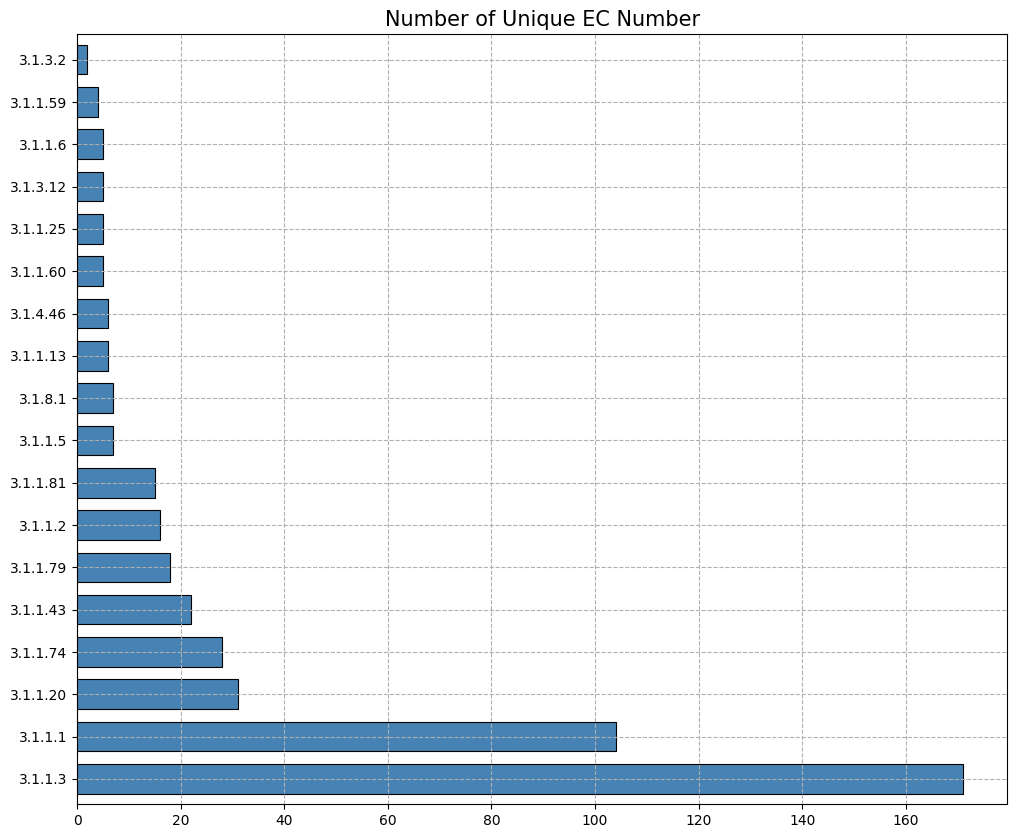

In [31]:
fig = plt.figure(figsize=(12, 10))
df['ec_number'].value_counts().plot.barh(width=0.7,
                                        color='steelblue',
                                        edgecolor='black',
                                        linewidth=0.8)
plt.grid(linestyle='--', linewidth=0.8)
plt.title("Number of Unique EC Number", size=15)
plt.savefig("Number of Unique EC Number.png", dpi=300)
plt.show()

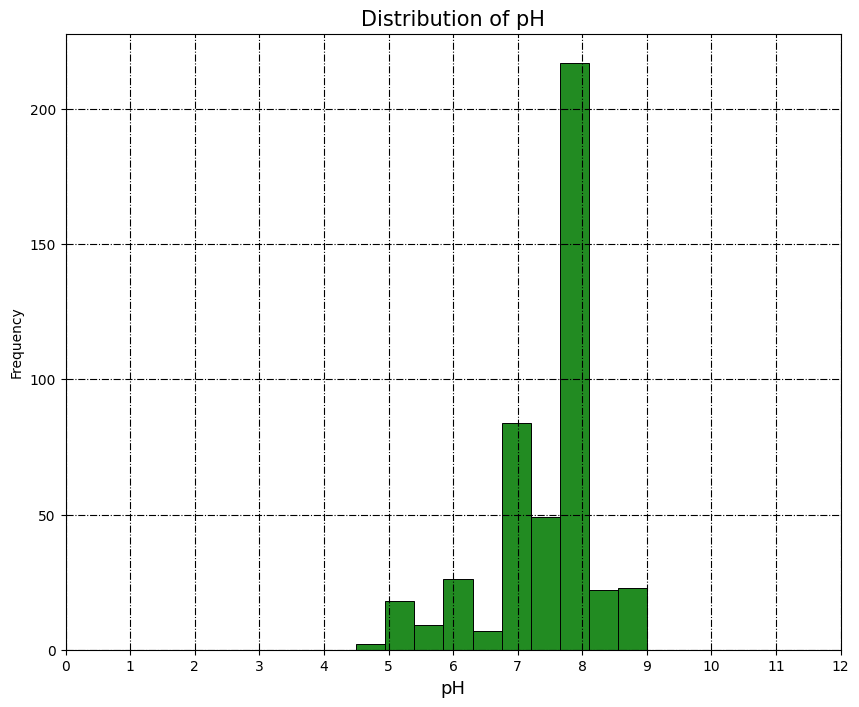

In [32]:
fig = plt.figure(figsize=(10, 8))
df['pH'].plot.hist(color='forestgreen',
                edgecolor='black',
                linewidth=0.7)
plt.grid(linestyle='-.', linewidth=0.8, color='black')
plt.title("Distribution of pH", size=15)
plt.xlabel("pH", size=13)
plt.xticks(range(0, 13, 1))
plt.savefig("Distribution of pH.png", dpi=300)
plt.show()

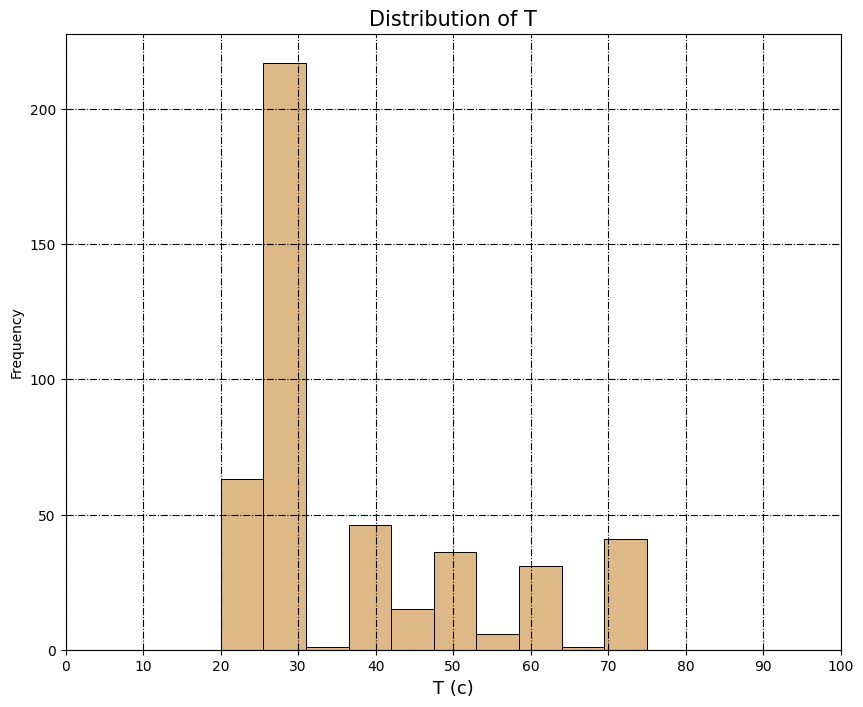

In [33]:
df['temp'] = df['temp'].replace("-", 30).astype("int")

fig = plt.figure(figsize=(10, 8))
df['temp'].plot.hist(color='burlywood',
                edgecolor='black',
                linewidth=0.7)
plt.grid(linestyle='-.', linewidth=0.8, color='black')
plt.title("Distribution of T", size=15)
plt.xlabel("T (c)", size=13)
plt.xticks(range(0, 110, 10))
plt.savefig("Distribution of T.png", dpi=300)
plt.show()

In [34]:
df["temp"].describe()

count    457.000000
mean      37.910284
std       14.658789
min       20.000000
25%       30.000000
50%       30.000000
75%       50.000000
max       75.000000
Name: temp, dtype: float64

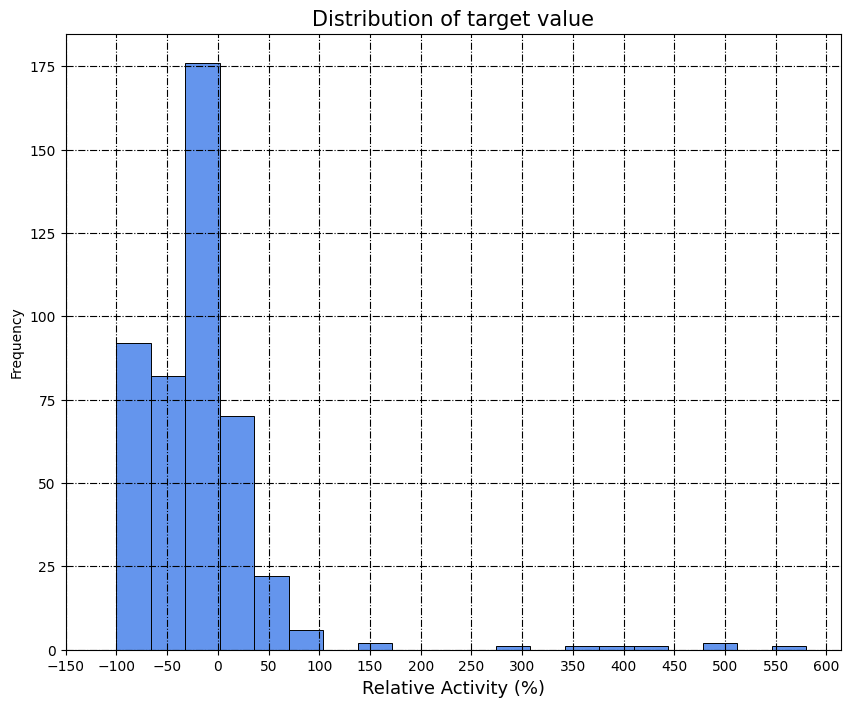

In [35]:
fig = plt.figure(figsize=(10, 8))
df['target'].plot.hist(bins=20,
                       color='cornflowerblue',
                       edgecolor='black',
                       linewidth=0.7)
plt.grid(linestyle='-.', linewidth=0.8, color='black')
plt.title("Distribution of target value", size=15)
plt.xlabel("Relative Activity (%)", size=13)
plt.xticks(range(-150, 650, 50))
plt.savefig("istribution of target value.png", dpi=300)
plt.show()

In [ ]:
total = df.shape[0]
decrease = df[df['target'] <= 0].shape[0]
increase = total - decrease
print(f"Activity is decreased in {decrease/total * 100:.2f} % cases")
print(f"Activity is increased in {increase/total * 100:.2f} % cases")
df['target'].describe()

Activity is decreased in 75.71 % cases
Activity is increased in 24.29 % cases


count    457.000000
mean     -17.280306
std       71.403651
min     -100.000000
25%      -58.000000
50%      -18.000000
75%        0.000000
max      580.000000
Name: target, dtype: float64

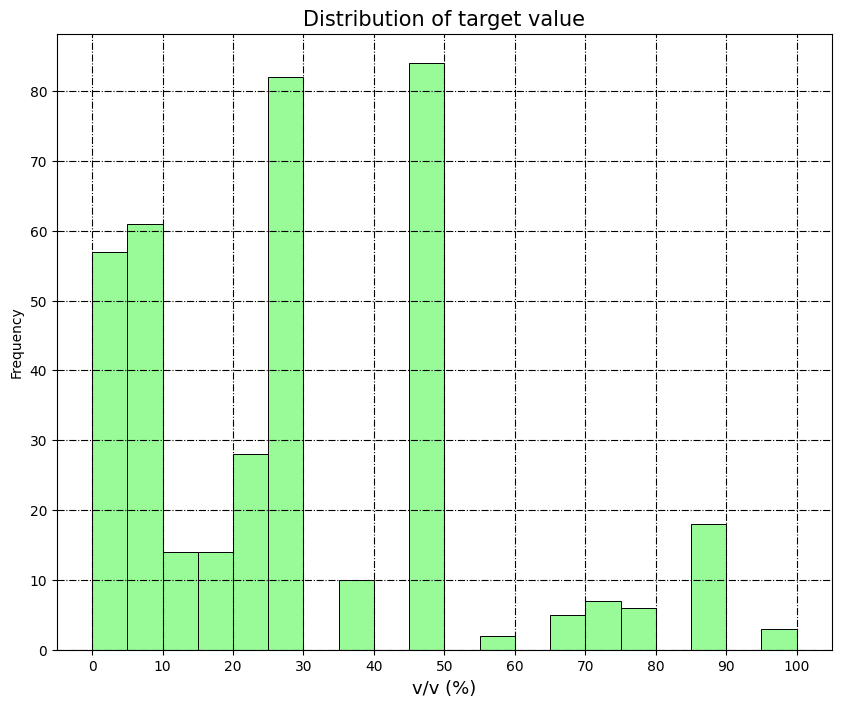

In [36]:
fig = plt.figure(figsize=(10, 8))
df[df['additive_label'] == "%v/v"]['additive_amount'].plot.hist(bins=20,
                       color='palegreen',
                edgecolor='black',
                linewidth=0.7)
plt.grid(linestyle='-.', linewidth=0.8, color='black')
plt.title("Distribution of target value", size=15)
plt.xlabel("v/v (%)", size=13)
plt.xticks(range(0, 110, 10))
plt.savefig("Distribution of target value.png", dpi=300)
plt.show()

In [37]:
df['additive_label'].value_counts()

%v/v    391
mL       42
mM       18
%w/v      4
M         2
Name: additive_label, dtype: int64

In [38]:
df[df['additive_label'] == "%v/v"].describe()

,temp,pH,additive_amount,target,additive_MolW
count,391.000000,391.000000,391.000000,391.000000,391.000000
mean,38.222506,7.528133,31.676266,-13.774680,88.976370
std,15.200847,0.871413,24.049236,73.587845,87.654244
min,20.000000,4.500000,0.010000,-100.000000,30.010565
25%,30.000000,7.000000,10.000000,-50.000000,46.041865
50%,30.000000,8.000000,30.000000,-16.000000,73.052764
75%,50.000000,8.000000,50.000000,1.500000,88.052429
max,75.000000,9.000000,100.000000,580.000000,1198.801305
